### Linear Regression


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [159]:
df = pd.read_csv("LinearRegression.csv",sep=";")

In [160]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [161]:
model = linear_model.LinearRegression()
model.fit(df[['area']],df.price)

LinearRegression()

In [162]:
value = 3300
model.predict([[value]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

price = a*area + b

In [163]:
a = model.coef_
b = model.intercept_
y = a*value + b


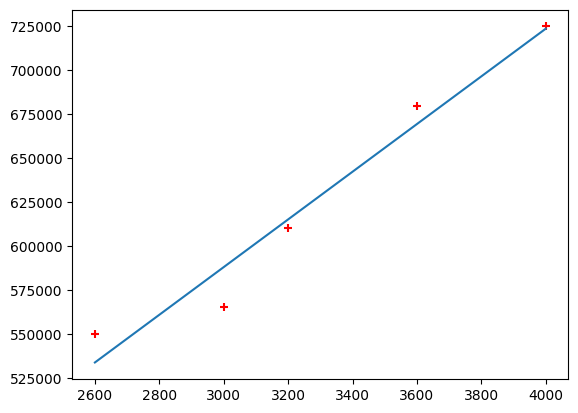

In [164]:
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,model.predict(df[['area']]))

#### Zapisywanie modelu

Metoda Pickle

In [165]:
import pickle
with open('model pickle','wb') as file:
    pickle.dump(model,file)
    

Metoda joblib z sklearn

In [166]:
import joblib

joblib.dump(model,'model_joblib')

['model_joblib']

#### Wczytywanie modelu

In [167]:
with open('model pickle','rb') as file:
    mp = pickle.load(file)

mp.predict([[5000]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [168]:
mj = joblib.load('model_joblib')
mj.predict([[5000]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

Metoda joblib z sklearn


### Task 1


In [169]:
df = pd.read_csv("LinearRegression_Task.csv")
df
result = model.predict(df)
result

array([316404.10958904, 384297.94520548, 492928.08219178, 661304.79452055,
       740061.64383562, 799808.21917808, 926090.75342466, 650441.78082192,
       740061.64383562, 799808.21917808, 540046.40410959, 528776.02739726,
       686425.51369863, 834434.07534247])

In [170]:
df['prices'] = result
# df.to_csv("LinearRegression_Task.csv",index=False)

### Task 2

In [171]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [172]:
model = linear_model.LinearRegression()
model.fit(df[['year']],df[['per capita income (US$)']])

LinearRegression()

In [173]:
prediction = pd.DataFrame({"year": [2020]})
result = model.predict(prediction)
result

array([[41288.69409442]])

### Linear Regression with multiple variables

In [174]:
df = pd.read_csv("multiplevariables.csv",sep=';')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Aby użyć regresji liniowej, każdy współcznynnik powinien być liniowy względem siebie.  
Na przykład im starszy dom, tym jest tańszy lub im większy jest tym droższy. 

Równanie b,edzie mniej więcej wyglądało w ten sposób ( jets oparte na trzech wektorach ):  
price = m1 * area + m2 * bedrooms + m3 * age + b  
price - depended variable  
area, bedrooms, age - features ( independend variable )

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      5 non-null      int64  
 1   bedrooms  4 non-null      float64
 2   age       5 non-null      int64  
 3   price     5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [176]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [177]:
X = imputer.transform(df)
ndf = pd.DataFrame(X,columns = df.columns,index = df.index)
ndf

,area,bedrooms,age,price
0,2600.0,3.0,20.0,550000.0
1,3000.0,4.0,15.0,565000.0
2,3200.0,3.5,18.0,610000.0
3,3600.0,3.0,30.0,595000.0
4,4000.0,5.0,8.0,760000.0


In [178]:
model = linear_model.LinearRegression()
model.fit(ndf[['area','bedrooms','age']],df.price) # po lewej independent values, po prawej target value

LinearRegression()

In [179]:
model.coef_

array([    198.47159002, -116583.73881651,  -14267.77585936])

coefficiens to we wcześniej wspomnianym wzorze m1, m2 i m3

In [180]:
model.intercept_

656046.539004866

In [181]:
model.predict([[3000,3,15]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([687693.45471668])

### Task 3

In [182]:
df = pd.read_csv("multiplevariables_Task.csv",sep=';')
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [183]:
from word2number import w2n
df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x,str) else x)
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [184]:
experience_inputer = SimpleImputer(strategy='constant',fill_value=0)
only_experience = df[['experience']]
inputed = experience_inputer.fit_transform(only_experience)
new_experience = pd.DataFrame(inputed,columns=['experience'])
df['experience'] = new_experience
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [185]:
test_score_inputer = SimpleImputer(strategy='mean')
only_test_score = df[['test_score(out of 10)']]
inputed_test_score = test_score_inputer.fit_transform(only_test_score)
inputed_test_score = inputed_test_score.astype(int)
new_test_score = pd.DataFrame(inputed_test_score,columns=only_test_score.columns)
df['test_score(out of 10)'] = new_test_score

In [186]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary
0,0.0,8,9,50000
1,0.0,8,6,45000
2,5.0,6,7,60000
3,2.0,10,10,65000
4,7.0,9,6,70000
5,3.0,7,10,62000
6,10.0,7,7,72000
7,11.0,7,8,80000


In [187]:
model = linear_model.LinearRegression()
model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df.salary)


LinearRegression()

In [188]:
model.predict([[2,9,6]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [189]:
model.predict([[12,10,10]])

e:\ML & Data\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])